<a href="https://colab.research.google.com/github/Parishri07/Anime-Recommendation-system/blob/main/Anime_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
anime = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Anime Dataset/anime.csv')
watching_status = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Anime Dataset/watching_status.csv')
animelist = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Anime Dataset/animelist.csv')
rating_complete = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Anime Dataset/rating_complete.csv')
anime_with_synopsis = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Anime Dataset/anime_with_synopsis.csv')

In [4]:
anime

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,...,Unknown,Unknown,Unknown,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",Summer 2021,...,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [9]:
anime.columns

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')

Low Variance Filter:
Remove features with very little variation across data points.

In [11]:
from sklearn.feature_selection import VarianceThreshold

numerical_features = anime.select_dtypes(include=[np.number])

selector = VarianceThreshold(threshold=0.01)
selector.fit(numerical_features)

features_to_keep = numerical_features.columns[selector.get_support()]

low_variance_features = numerical_features.columns[~selector.get_support()]
print("Features with low variance:", low_variance_features.tolist())

reduced_data = anime.loc[:, features_to_keep]
reduced_data

Features with low variance: []


,MAL_ID,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
0,1,39,1251960,61971,105808,718161,71513,26678,329800
1,5,518,273145,1174,4143,208333,1935,770,57964
2,6,201,558913,12944,29113,343492,25465,13925,146918
3,7,1467,94683,587,4300,46165,5121,5378,33719
4,8,4369,13224,18,642,7314,766,1108,3394
...,...,...,...,...,...,...,...,...,...
17557,48481,13116,354,6,0,0,0,0,354
17558,48483,17562,7010,70,14,0,14,0,6982
17559,48488,17558,11309,48,3,0,0,0,11306
17560,48491,17565,1386,2,13,2,2,1,1368


In [12]:
anime = reduced_data
anime.columns

Index(['MAL_ID', 'Popularity', 'Members', 'Favorites', 'Watching', 'Completed',
       'On-Hold', 'Dropped', 'Plan to Watch'],
      dtype='object')

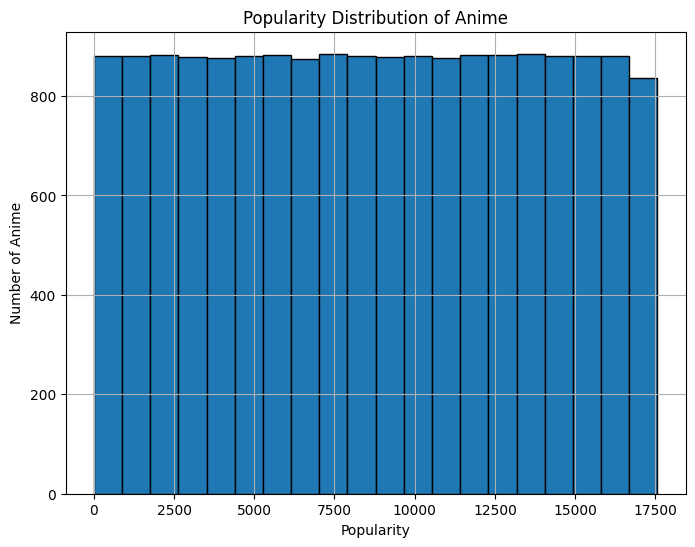

In [20]:
popularity = anime["Popularity"]

plt.figure(figsize=(8, 6))
plt.hist(popularity, bins=20, edgecolor="black")
plt.xlabel("Popularity")
plt.ylabel("Number of Anime")
plt.title("Popularity Distribution of Anime")
plt.grid(True)
plt.show()

In [13]:
sorted_data = anime.sort_values(by='Popularity', ascending=False)

anime_top = sorted_data.head(10000)

anime_top

,MAL_ID,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
17560,48491,17565,1386,2,13,2,2,1,1368
17555,48471,17564,1857,6,0,0,1,0,1856
17561,48492,17563,310,0,4,0,1,1,304
17558,48483,17562,7010,70,14,0,14,0,6982
17553,48466,17561,454,0,1,0,0,0,453
...,...,...,...,...,...,...,...,...,...
1628,1789,7549,3331,1,50,2177,64,67,973
6209,10429,7549,3331,7,201,1988,141,171,830
4824,6930,7549,3347,1,42,2775,33,89,408
12634,34821,7547,3356,5,359,1756,161,166,914


In [5]:
watching_status

,status,description
0,1,Currently Watching
1,2,Completed
2,3,On Hold
3,4,Dropped
4,6,Plan to Watch


In [6]:
animelist

,user_id,anime_id,rating,watching_status,watched_episodes
0,0,67,9,1,1
1,0,6702,7,1,4
2,0,242,10,1,4
3,0,4898,0,1,1
4,0,21,10,1,0
...,...,...,...,...,...
109224742,353404,507,7,2,2
109224743,353404,392,9,2,112
109224744,353404,882,6,2,1
109224745,353404,883,8,2,1


In [34]:
N = 750
top_users = animelist.groupby("user_id")["rating"].count().sort_values(ascending=False).head(N)

user_filtered_data = animelist[animelist["user_id"].isin(top_users.index)]

sampled_anime = pd.Series(user_filtered_data["anime_id"].unique()).sample(100, replace=False)

reduced_data = user_filtered_data[user_filtered_data["anime_id"].isin(sampled_anime)]

print("Number of rows in reduced DataFrame:", len(reduced_data))

Number of rows in reduced DataFrame: 19242


In [42]:
animelist_reduced = reduced_data
animelist_reduced

,user_id,anime_id,rating,watching_status,watched_episodes
234531,781,16405,6,2,12
234770,781,32264,5,2,1
235356,781,33215,3,2,1
235382,781,15895,0,2,3
235442,781,18425,0,2,3
...,...,...,...,...,...
109034146,352811,3071,0,2,1
109034495,352811,23333,0,4,0
109034538,352811,20509,0,6,0
109034616,352811,1070,0,6,0


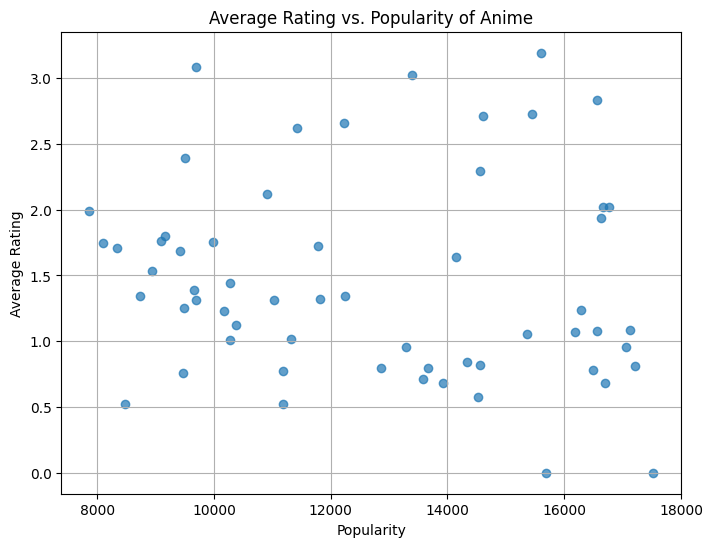

In [44]:
merged_data = pd.merge(anime_top, animelist_reduced, left_on='MAL_ID', right_on='anime_id')

average_ratings = merged_data.groupby('MAL_ID')['rating'].mean()

anime_with_ratings = pd.merge(anime_top, average_ratings, on='MAL_ID')

plt.figure(figsize=(8, 6))
plt.scatter(anime_with_ratings['Popularity'], anime_with_ratings['rating'], alpha=0.7)
plt.xlabel("Popularity")
plt.ylabel("Average Rating")
plt.title("Average Rating vs. Popularity of Anime")
plt.grid(True)
plt.show()

In [7]:
rating_complete

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9
...,...,...,...
57633273,353404,502,8
57633274,353404,987,4
57633275,353404,225,8
57633276,353404,243,7


In [40]:
N = 600
top_users = rating_complete.groupby("user_id")["rating"].count().sort_values(ascending=False).head(N)

user_filtered_data = rating_complete[rating_complete["user_id"].isin(top_users.index)]

sampled_anime = pd.Series(user_filtered_data["anime_id"].unique()).sample(100, replace=False)

reduced_rating = user_filtered_data[user_filtered_data["anime_id"].isin(sampled_anime)]

print("Number of rows in reduced DataFrame:", len(reduced_rating))

Number of rows in reduced DataFrame: 10696


In [41]:
reduced_rating

,user_id,anime_id,rating
119155,781,11887,9
119349,781,19115,7
119807,781,17351,6
119854,781,36086,4
119926,781,32730,7
...,...,...,...
57556816,352930,911,7
57556873,352930,11887,9
57556945,352930,7088,8
57557211,352930,53,7


In [8]:
anime_with_synopsis

,MAL_ID,Name,Score,Genres,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...
...,...,...,...,...,...
16209,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",No synopsis information has been added to this...
16210,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",ko is a typical high school student whose life...
16211,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Sequel to Higurashi no Naku Koro ni Gou .
16212,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",New Yama no Susume anime.


Stratified sampling: This technique ensures your sample reflects the proportions of different categories within your data. (to reduce the no of rows)

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

strata_column = "Genres"
sample_size = 10000

value_counts = anime_with_synopsis[strata_column].value_counts()
rare_genres = value_counts[value_counts == 1].index.tolist()

anime_filtered = anime_with_synopsis[~anime_with_synopsis[strata_column].isin(rare_genres)]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=sample_size/len(anime_filtered))

for train_index, test_index in strat_split.split(anime_filtered, anime_filtered[strata_column]):
    sampled_data = anime_filtered.iloc[test_index]

print("Sampled data size:", len(sampled_data))
print("Sample distribution by", strata_column)
print(sampled_data[strata_column].value_counts())

Sampled data size: 10000
Sample distribution by Genres
Genres
Music                                                      602
Comedy                                                     509
Kids                                                       315
Kids, Music                                                178
Dementia                                                   174
                                                          ... 
Drama, Game, Josei, School, Slice of Life, Sports            1
Action, Ecchi, Harem, Martial Arts, School, Super Power      1
Adventure, Supernatural                                      1
Fantasy, Slice of Life, Supernatural                         1
Drama, Romance, School, Shounen                              1
Name: count, Length: 1761, dtype: int64


In [43]:
anime_with_synopsis_reduced = sampled_data
anime_with_synopsis_reduced

,MAL_ID,Name,Score,Genres,sypnopsis
2680,3315,Kikou Keisatsu Metal Jack,6.28,"Action, Sci-Fi, Police, Mecha","Twenty years into the future, a city now calle..."
15780,42798,Sayonara Watashi no Cramer Movie: First Touch,Unknown,"Sports, Romance, School, Shounen",14-year-old Nozomi Onda has only one thing on ...
3520,5277,Sekirei: Pure Engagement,7.36,"Action, Comedy, Ecchi, Harem, Super Power",The second stage of the battle royale known as...
14490,39704,Shiroi Unabara,Unknown,Drama,Satomi Maiya's graduate work at the Tokyo Univ...
10780,33447,Piace: Watashi no Italian,5.88,"Slice of Life, Comedy","hile on her summer break, Morina Nanase starts..."
...,...,...,...,...,...
9700,30988,Futsuu no Joshikousei ga [Locodol] Yattemita. OVA,7.06,"Slice of Life, Comedy, Seinen",OVA for the idol girls series Futsuu no Joshik...
14473,39678,Mei Chuxi de Yinyangshi Yijia,6.1,"Slice of Life, Comedy, Historical, Demons, Sup...",No synopsis information has been added to this...
9657,30929,Aladdin to Mahou no Lamp no Koutsuu Anzen,Unknown,"Drama, Fantasy, Kids",ducational film about traffic safety staring A...
5073,9575,Nodoka Mori no Doubutsu Daisakusen,5.6,Fantasy,"h Peter the fairy as chairman, the animals of ..."


genres = anime_data["Genres"].explode().str.strip()


genre_counts = genres.value_counts()


plt.figure(figsize=(10, 6))
genre_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Distribution of Anime Genres (Single Bar)")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability with many genres
plt.tight_layout()
plt.show()

Check